In [3]:
import pandas as pd

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.DataFrame({
    "age": [22, 23, 23, 24, 24, 25, 25, 25, 26, ]  # 100 = outlier
})

In [33]:
mean_age = data["age"].mean()
median_age = data["age"].median()
mode_age = data["age"].mode()[0]

age_range = data['age'].max() -data['age'].min()
age_variance = data['age'].var()
age_std = data['age'].std()

In [34]:
print("mean", mean_age)
print("median", median_age)
print("moad", mode_age)

print('age_range', age_range)
print('age_variance', age_variance)
print('age_std', age_std)

mean 24.11111111111111
median 24.0
moad 25
age_range 4
age_variance 1.6111111111111112
age_std 1.2692955176439846


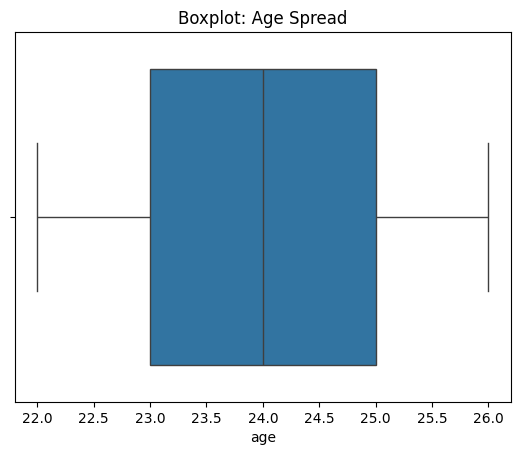

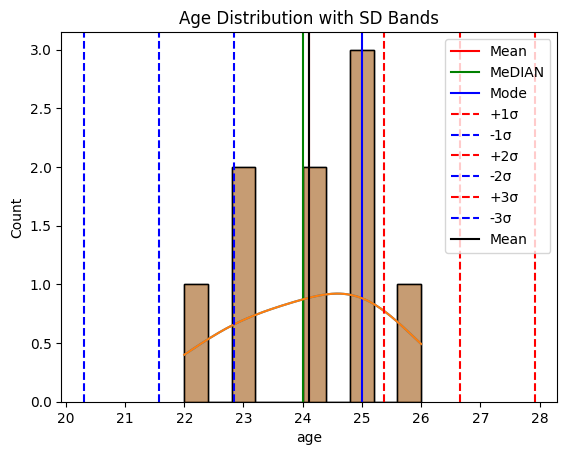

In [38]:
# Visualize spread
sns.boxplot(x=data["age"])
plt.title("Boxplot: Age Spread")
plt.show()
sns.histplot(data['age'] , kde=True, bins=10)
plt.axvline(mean_age, color="red",label="Mean")
plt.axvline(median_age, color="green",label="MeDIAN")
plt.axvline(mode_age, color="blue",label="Mode")
plt.legend()
plt.title('dist of ages')
sns.histplot(data["age"], kde=True, bins=10)
for i in range(1, 4):
    plt.axvline(mean_age + i*age_std, color='red', linestyle='--', label=f'+{i}σ')
    plt.axvline(mean_age - i*age_std, color='blue', linestyle='--', label=f'-{i}σ')
plt.axvline(mean_age, color='black', label='Mean')
plt.legend()
plt.title("Age Distribution with SD Bands")
plt.show()
plt.show()

Skewness: 0.17597068371609914
Kurtosis: -1.50041223430996
Z-Scores:
 [-1.1384042  -0.46875467 -0.46875467  0.20089486  0.46875467  0.87054439
  1.0044743   1.40626401  1.54019392 -1.1384042  -1.1384042  -1.1384042 ]


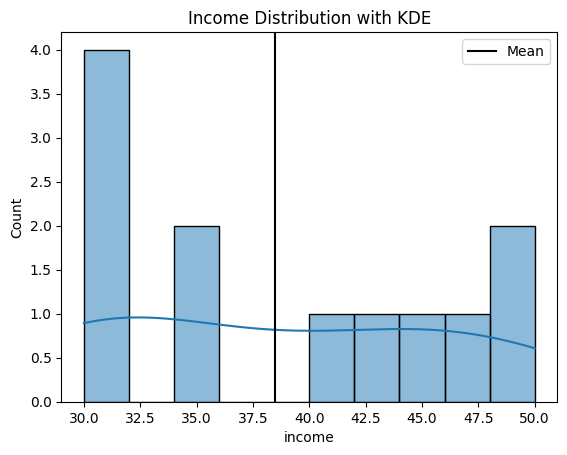

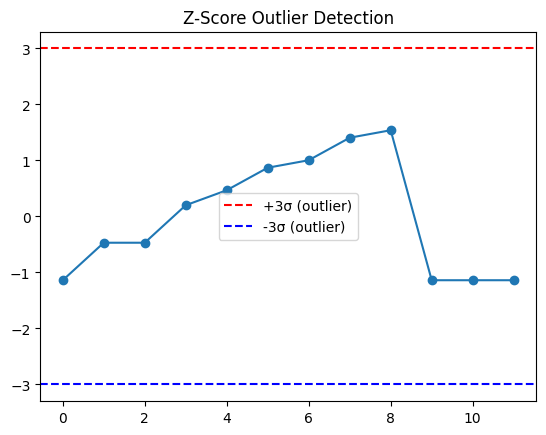

In [44]:
from scipy.stats import skew , kurtosis, zscore
data = pd.DataFrame({
    "income": [30, 35, 35, 40, 42, 45, 46, 49, 50,30,30,30 ]  # 120 is outlier
})
sk = skew(data['income'])
kt= kurtosis(data['income'], fisher=True)
zs = zscore(data['income'])

print("Skewness:", sk)
print("Kurtosis:", kt)
print("Z-Scores:\n", zs)

sns.histplot(data["income"], kde=True, bins=10)
plt.axvline(data["income"].mean(), color='black', label='Mean')
plt.title("Income Distribution with KDE")
plt.legend()
plt.show()

# Visualize Z-scores
plt.plot(zs, marker='o')
plt.axhline(3, color='red', linestyle='--', label='+3σ (outlier)')
plt.axhline(-3, color='blue', linestyle='--', label='-3σ (outlier)')
plt.title("Z-Score Outlier Detection")
plt.legend()
plt.show()

In [45]:
np.random.seed(42)
coin_tosses = np.random.choice(['head', 'tail'],size=1000)
coin_df = pd.DataFrame(coin_tosses, columns=['outcome'])
coin_probs = coin_df['outcome'].value_counts(normalize=True)
print("coin toss prob", coin_probs)

coin toss prob outcome
tail    0.51
head    0.49
Name: proportion, dtype: float64


In [46]:
dice_rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=1000)
dice_df = pd.DataFrame(dice_rolls, columns=["Roll"])
dice_probs = dice_df["Roll"].value_counts(normalize=True).sort_index()
print("\nDice Roll Probability:\n", dice_probs)


Dice Roll Probability:
 Roll
1    0.178
2    0.168
3    0.174
4    0.133
5    0.177
6    0.170
Name: proportion, dtype: float64


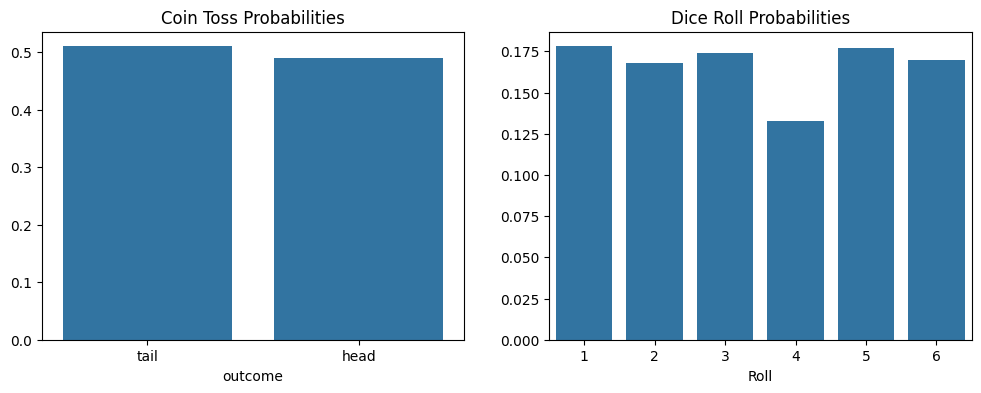

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=coin_probs.index, y=coin_probs.values)
plt.title("Coin Toss Probabilities")

plt.subplot(1, 2, 2)
sns.barplot(x=dice_probs.index, y=dice_probs.values)
plt.title("Dice Roll Probabilities")
plt.show()

In [52]:
import numpy as np
import pandas as pd
np.random.seed(1)
n =1000
smoke = np.random.choice([1,0], size=n, p=[0.3, 0.7])
disease = []

for s in smoke:
    prob = 0.2 if s == 1 else 0.05
    disease.append(np.random.choice([1,0],p=[prob, 1-prob]))

df = pd.DataFrame({'Smoker':smoke, "Disease":disease})

p_smoke = df['Smoker'].mean()
p_disease = df['Disease'].mean()
p_join =  len(df[(df["Smoker"] == 1) & (df["Disease"] == 1)]) / n
p_cond = p_join / p_smoke
print(f"P(Smoker): {p_smoke:.2f}")
print(f"P(Disease): {p_disease:.2f}")
print(f"P(Smoker ∩ Disease): {p_join:.2f}")
print(f"P(Disease | Smoker): {p_cond:.2f}")

P(Smoker): 0.30
P(Disease): 0.09
P(Smoker ∩ Disease): 0.06
P(Disease | Smoker): 0.21


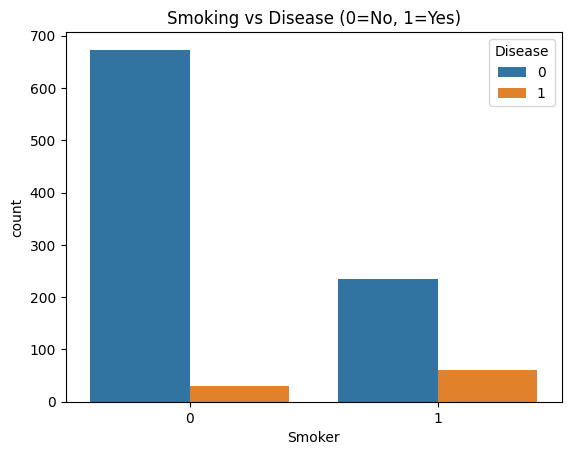

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked bar plot: Smoking vs Disease
sns.countplot(x="Smoker", hue="Disease", data=df)
plt.title("Smoking vs Disease (0=No, 1=Yes)")
plt.legend(title="Disease")
plt.show()


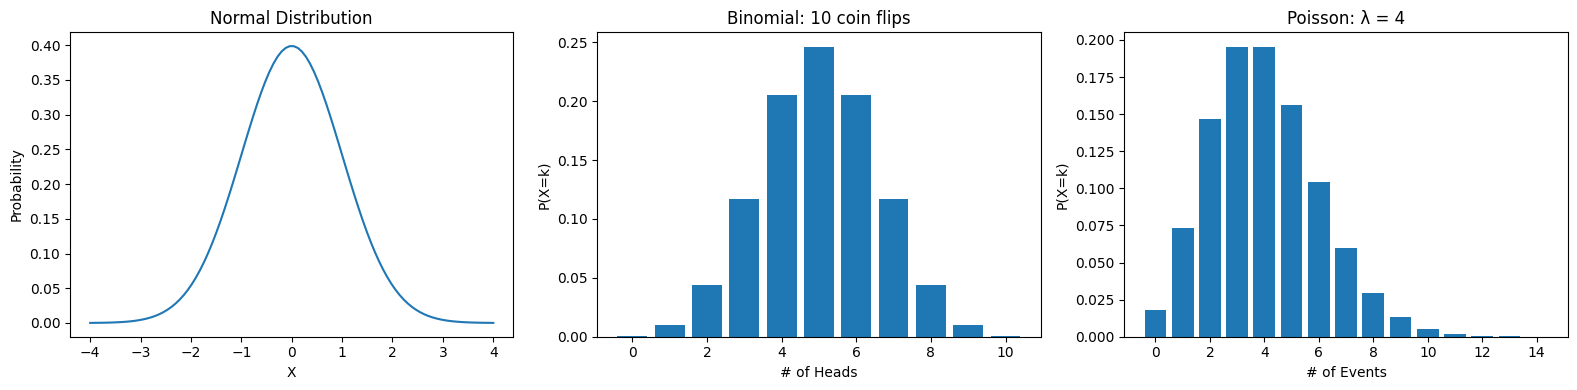

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson

# Set up subplots
plt.figure(figsize=(16, 4))

# 1. Normal Distribution
plt.subplot(1, 3, 1)
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1), label='μ=0, σ=1')
plt.title("Normal Distribution")
plt.xlabel("X")
plt.ylabel("Probability")

# 2. Binomial Distribution
plt.subplot(1, 3, 2)
n, p = 10, 0.5  # 10 flips, 50% chance of heads
x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x, n, p))
plt.title("Binomial: 10 coin flips")
plt.xlabel("# of Heads")
plt.ylabel("P(X=k)")

# 3. Poisson Distribution
plt.subplot(1, 3, 3)
x = np.arange(0, 15)
λ = 4
plt.bar(x, poisson.pmf(x, mu=λ))
plt.title("Poisson: λ = 4")
plt.xlabel("# of Events")
plt.ylabel("P(X=k)")

plt.tight_layout()
plt.show()


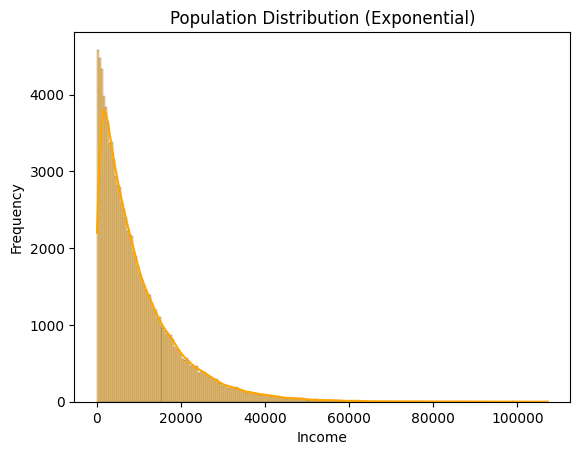

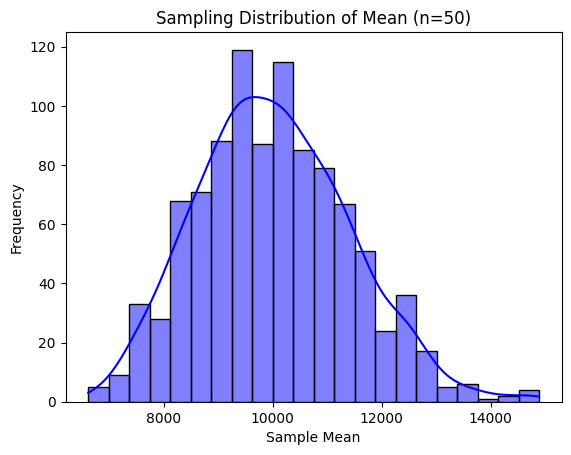

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Population: Skewed income data
np.random.seed(0)
population = np.random.exponential(scale=10000, size=100000)

# Visualize population distribution
sns.histplot(population, kde=True, color='orange')
plt.title("Population Distribution (Exponential)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Simulate sampling means
sample_means = []
for _ in range(1000):  # 1000 samples
    sample = np.random.choice(population, size=50)
    sample_means.append(np.mean(sample))

# Plot sample means distribution
sns.histplot(sample_means, kde=True, color='blue')
plt.title("Sampling Distribution of Mean (n=50)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


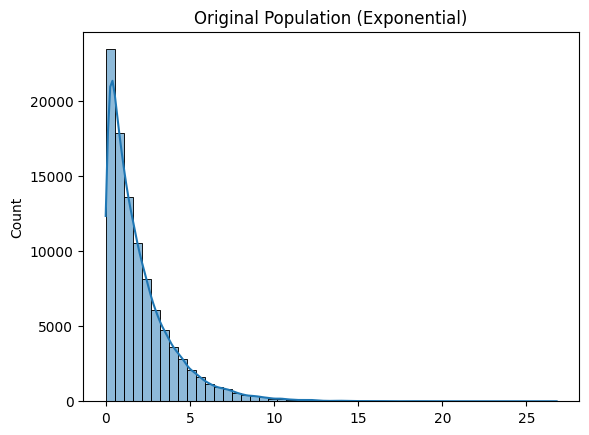

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a non-normal population (e.g., exponential)
population = np.random.exponential(scale=2.0, size=100_000)

# Visualize the population
sns.histplot(population, bins=50, kde=True)
plt.title("Original Population (Exponential)")
plt.show()


In [3]:
sample_means = []

sample_size = 50  # you can try 10, 30, 100
n_samples = 1000

for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))


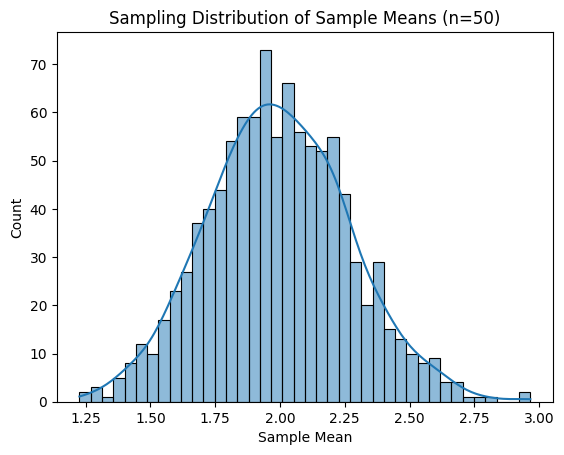

In [4]:
sns.histplot(sample_means, bins=40, kde=True)
plt.title(f"Sampling Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.show()


In [6]:
import numpy as np
from scipy import stats

data = [10, 12, 15, 14, 13, 12, 100]  # One clear outlier
z_scores = stats.zscore(data)

print(z_scores)


[-0.4949274  -0.42955963 -0.33150797 -0.36419186 -0.39687574 -0.42955963
  2.44662223]


In [7]:
import numpy as np

a = np.array([1, 2])
b = np.array([4, 6])

distance = np.linalg.norm(a - b)
print("Euclidean Distance:", distance)


Euclidean Distance: 5.0


In [8]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10],
    'z': [5, 4, 3, 2, 1]
})

# Covariance
print(df.cov())

# Correlation
print(df.corr())


     x     y    z
x  2.5   5.0 -2.5
y  5.0  10.0 -5.0
z -2.5  -5.0  2.5
     x    y    z
x  1.0  1.0 -1.0
y  1.0  1.0 -1.0
z -1.0 -1.0  1.0


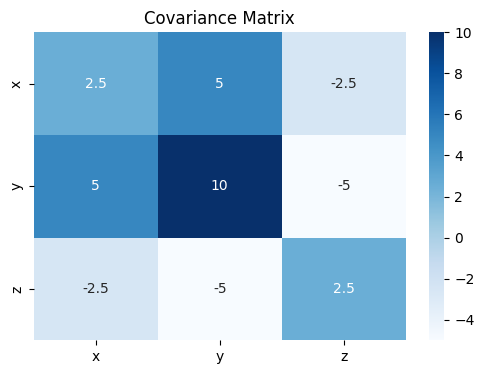

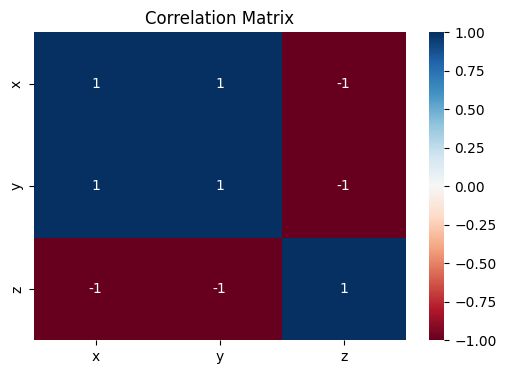

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10],
    'z': [5, 4, 3, 2, 1]
})

# Covariance matrix
cov_matrix = df.cov()

# Correlation matrix
corr_matrix = df.corr()

# Plot covariance heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap='Blues')
plt.title("Covariance Matrix")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Matrix")
plt.show()


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)
n = 100

# Simulated student data
study_hours = np.random.normal(5, 2, n)                 # hours/day
sleep_hours = 9 - 0.3 * study_hours + np.random.normal(0, 0.5, n)  # inverse relation
grades = 50 + 8 * study_hours + np.random.normal(0, 5, n)          # strong positive
screen_time = 10 - 0.5 * study_hours + np.random.normal(0, 1, n)   # inverse
exercise = 1 + 0.2 * sleep_hours + np.random.normal(0, 0.2, n)     # weak positive

df = pd.DataFrame({
    'Study Hours': study_hours,
    'Sleep Hours': sleep_hours,
    'Grades': grades,
    'Screen Time': screen_time,
    'Exercise Hours': exercise
})


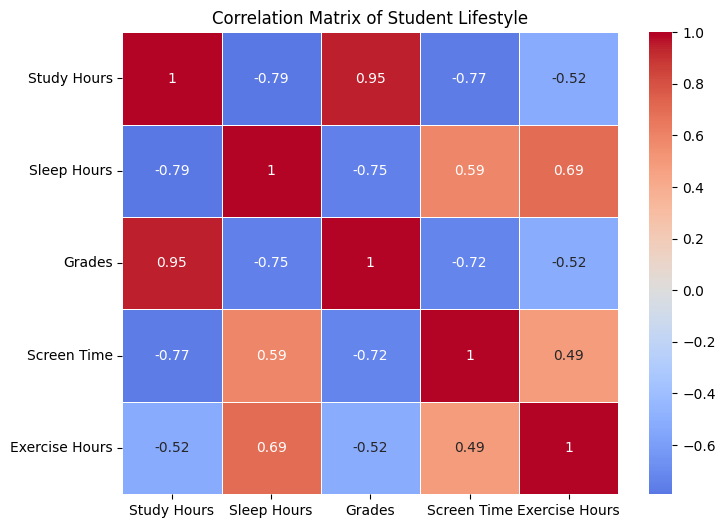

In [11]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Student Lifestyle")
plt.show()
